### Generate Data

In [1]:
import numpy as np
import matplotlib.pyplot as plt
def generate_linear_data(a,b,num):
    x = np.arange(0,num)
    y = (a*x+b) + (2*np.random.random((num)) -1)
    return x,y

In [2]:
x,y = generate_linear_data(a=1,b=1,num=10)

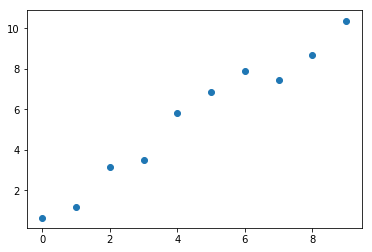

In [3]:
plt.scatter(x,y)
plt.show()

### Vanilla linear regression closed form solution

In [4]:
def covariance(x,y):
    return np.cov(x,y)[0][1]
def variance(x):
    return np.var(x)
def mean(x):
    return np.mean(x)

class LinearRegressionClosed:
#     A closed form solution for, y = B0 + B1*x
    B0 = None
    B1 = None
    
    def fit(self,x_arr, y_arr):
        self.B1 = covariance(x_arr,y_arr)/variance(x_arr)
        self.B0 = mean(y_arr) - self.B1*mean(x_arr)
        
    def predict(self,x_arr):
        y_arr=[]
        for x in x_arr:
            y_arr.append(self.B0 + self.B1*x)
        return y_arr
    
    def get_coefficients(self):
        return self.B0, self.B1

In [5]:
LR = LinearRegressionClosed()
LR.fit(x,y)

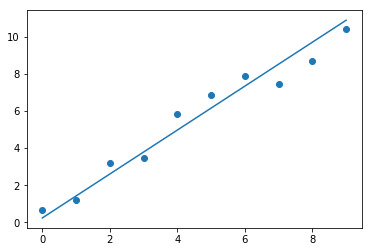

In [6]:
x_arr = range(10)
y_arr = LR.predict(x_arr)
plt.scatter(x,y)
plt.plot(x_arr,y_arr)
plt.show()

### Vanilla Linear Regression with SGD

In [8]:
class LinearRegression:
    weights=None
    
    def fit(self, features, target, num_steps, lr, add_intercept = False):
        weights = np.random.normal(size=(features.shape[1],1))
        
        for step in range(num_steps):
            scores = np.matmul(features, weights)
            gradients = np.matmul(features.T, scores-target)
            weights -= lr*gradients
            
            if step % 50 ==0:
                j = np.sum(np.square(scores-target))
                print("Loss is in iteration "+ str(step) + ": " + str(j))
        self.weights = weights
        
    def predict(self,features):
        return np.matmul(features, self.weights)

In [9]:
x_new = x.reshape((x.shape[0],-1))
y_new = y.reshape((y.shape[0],-1))
LR = LinearRegression()
LR.fit(x_new,y_new,200, 0.005)

Loss is in iteration 0: 1532.82961602
Loss is in iteration 50: 5.14622770735
Loss is in iteration 100: 5.14622770735
Loss is in iteration 150: 5.14622770735


In [10]:
x_arr = np.arange(10).reshape((10,1))
y_arr = LR.predict(x_arr)

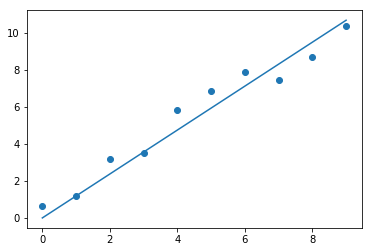

In [11]:
plt.scatter(x,y)
plt.plot(x_arr,y_arr)
plt.show()

### Scikit Learn

In [12]:
from sklearn import linear_model
LR = linear_model.LinearRegression()
LR.fit(x_new, y_new)
print('Coefficients: \n', LR.coef_)

Coefficients: 
 [[ 1.06356341]]


/Users/abhimanyumittal/.pyenv/versions/anaconda3-5.0.1/lib/python3.6/site-packages/scipy/linalg/basic.py:1226: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


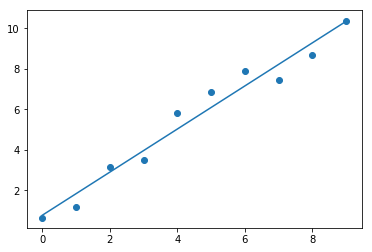

In [13]:
y_arr = LR.predict(x_arr)
plt.scatter(x,y)
plt.plot(x_arr,y_arr)
plt.show()